In [ ]:
!pip install turicreate==5.4
# The wrong version of MXNET will be installed
!pip uninstall -y mxnet
# Install CUDA10-compatible version of mxnet 
!pip install mxnet-cu100==1.4.0.post0

     |████████████████████████████████| 87.4MB 119kB/s 
     |████████████████████████████████| 327kB 45.3MB/s 
     |████████████████████████████████| 23.8MB 53.8MB/s 
     |████████████████████████████████| 2.7MB 37.2MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320847 sha256=e9af5aa62b481f7f775fb83f45a3dfdbf6032a132ea6166e137b8a685d8a256b
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built resampy
ERROR: mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.17.4 which is incompatible.
ERROR: mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: resampy 0.2.2
    Uninstalling resampy-0.2.2:
      Successfully uninstalled resampy-0.2.2
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import os.path
from google.colab import drive

# mount Google Drive to /content/drive/My Drive/
if os.path.isdir("/content/drive/My Drive"):
  print("Google Drive already mounted")
else:
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import mxnet as mx
import turicreate as tc

         To fix this, please install the currently recommended version:

             pip uninstall -y mxnet && pip install mxnet==1.1.0

         If you want to use a CUDA GPU, then change 'mxnet' to 'mxnet-cu90' (adjust 'cu90' depending on your CUDA version):



In [ ]:
# Use all GPUs (default)
tc.config.set_num_gpus(-1)

# Use only 1 GPU
#tc.config.set_num_gpus(1)

# Use CPU
#tc.config.set_num_gpus(0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

In [ ]:
np.random.seed(13)

# Data loading

In [3]:
base_db = pd.read_csv("use_db_sabato14.csv")
base_db.head()

,test_cas,exposure_type,obs_duration_mean,conc1_type,conc1_mean,class,tax_order,family,genus,species,atom_number,alone_atom_number,tripleBond,doubleBond,bonds_number,ring_numer,Mol,MorganDensity,LogP
0,10108-64-2,S,48.0,T,46.900,Actinopterygii,Cypriniformes,Cyprinidae,Carassius,auratus,0.273831,3,0,0,0.0,0.0,0.096146,0.666667,-5.9945
1,10108-64-2,S,24.0,T,200.000,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Fundulus,heteroclitus,0.273831,3,0,0,0.0,0.0,0.096146,0.666667,-5.9945
2,10108-64-2,F,96.0,T,0.001,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss,0.273831,3,0,0,0.0,0.0,0.096146,0.666667,-5.9945
3,10108-64-2,S,96.0,T,15.900,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Cyprinodon,variegatus,0.273831,3,0,0,0.0,0.0,0.096146,0.666667,-5.9945
4,10108-64-2,F,694.0,T,0.030,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,mykiss,0.273831,3,0,0,0.0,0.0,0.096146,0.666667,-5.9945


In [4]:
base_db96 = base_db[base_db.obs_duration_mean.isin([24, 48, 72, 96])]

In [5]:
X_original = base_db96.copy()
X_original = X_original[["test_cas", "species", "conc1_mean", "exposure_type", "conc1_type", "obs_duration_mean"]].reset_index(drop=True)
X_original.head()

,test_cas,species,conc1_mean,exposure_type,conc1_type,obs_duration_mean
0,10108-64-2,auratus,46.900,S,T,48.0
1,10108-64-2,heteroclitus,200.000,S,T,24.0
2,10108-64-2,mykiss,0.001,F,T,96.0
3,10108-64-2,variegatus,15.900,S,T,96.0
4,10108-64-2,niloticus,19.919,R,T,96.0


In [6]:
X_side_species = base_db96.copy()
X_side_species = X_side_species[["species", "class", "tax_order", "family", "genus"]]
X_side_species = X_side_species.drop_duplicates(subset="species").reset_index(drop=True)
X_side_species.head()

,species,class,tax_order,family,genus
0,auratus,Actinopterygii,Cypriniformes,Cyprinidae,Carassius
1,heteroclitus,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Fundulus
2,mykiss,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus
3,variegatus,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Cyprinodon
4,niloticus,Actinopterygii,Perciformes,Cichlidae,Oreochromis


In [7]:
X_side_cas = base_db96.copy()
X_side_cas = X_side_cas[["test_cas", "alone_atom_number", "tripleBond", "doubleBond", "ring_numer"]]
X_side_cas = X_side_cas.drop_duplicates(subset="test_cas").reset_index(drop=True)
X_side_cas = X_side_cas.dropna()
X_side_cas.head()

,test_cas,alone_atom_number,tripleBond,doubleBond,ring_numer
0,10108-64-2,3,0,0,0.0
1,88-30-2,2,0,1,1.0
2,1397-94-0,5,0,5,2.0
3,540-72-7,2,1,0,0.0
4,72-43-5,0,0,0,2.0


In [8]:
X_original.index.size

45775

In [9]:
def scores_cat(x):
    if (x < 10**-1):
        return 5
    # elif ((x>=10**-2) and (x<10**-1)):
    #     return 6
    elif ((x>=10**-1) and (x<10**0)):
        return 4
    elif ((x>=10**0) and (x<10**1)):
        return 3
    elif ((x>=10**1) and (x<10**2)):
        return 2
    # elif ((x>=10**2) and (x<10**3)):
    #     return 2
    else:
        return 1

In [10]:
X_original = X_original.groupby(by=["test_cas", "species", "conc1_type", "exposure_type", "obs_duration_mean"]).agg("median").reset_index()
X_original["score"] = X_original.conc1_mean.apply(lambda x: scores_cat(x))

In [11]:
X_original.index.size

23332

In [12]:
enc_species = OrdinalEncoder(dtype=int)
enc_species.fit(X_original.species.values.reshape(-1, 1))
enc_cas = OrdinalEncoder(dtype=int)
enc_cas.fit(X_original.test_cas.values.reshape(-1,1))

X_original["species"] = enc_species.transform(X_original.species.values.reshape(-1,1))
X_original["test_cas"] = enc_cas.transform(X_original.test_cas.values.reshape(-1,1))
X_side_species["species"] = enc_species.transform(X_side_species.species.values.reshape(-1,1))
X_side_cas["test_cas"] = enc_cas.transform(X_side_cas.test_cas.values.reshape(-1,1))

X_fact = X_original.drop(columns=["conc1_mean"]).reset_index(drop=True)

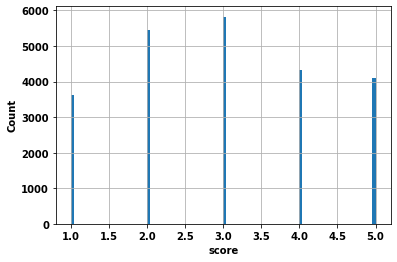

In [13]:
X_fact_scored = X_fact.copy()
#X_fact_scored.score = X_fact_scored.score.apply(lambda x: np.log(x))

# plotting the distribution of conc inside this case
X_fact_scored.score.hist(bins=100)
#plt.yscale('log')
plt.xlabel("score")
plt.ylabel("Count");

# Basic tests

In [ ]:
X_train_scored, X_test_scored = train_test_split(X_fact_scored, test_size=0.33, shuffle=True, random_state=13)
X_train_scored = X_train_scored.reset_index(drop=True)
X_test_scored = X_test_scored.reset_index(drop=True)

In [ ]:
X = tc.SFrame(X_fact_scored)
X

test_cas,species,conc1_type,exposure_type,obs_duration_mean,score
0,378,F,F,48.0,2
0,378,F,F,96.0,2
1,217,F,AQUA,48.0,2
1,236,A,S,24.0,2
1,236,A,S,48.0,2
1,256,A,S,24.0,1
1,256,A,S,48.0,1
1,256,A,S,96.0,2
1,306,A,S,24.0,2
1,306,A,S,48.0,2


In [ ]:
X_cas = tc.SFrame(X_side_cas)
X_cas

test_cas,tripleBond
52,0
2424,0
642,0
1583,1
2020,0
1178,0
908,0
2192,0
2200,0
2412,0


In [ ]:
X_species = tc.SFrame(X_side_species)
X_species

species,class,tax_order,family,genus
39,Actinopterygii,Cypriniformes,Cyprinidae,Carassius
203,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Fundulus
306,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus
460,Actinopterygii,Cyprinodontiformes,Cyprinodontidae,Cyprinodon
320,Actinopterygii,Perciformes,Cichlidae,Oreochromis
220,Actinopterygii,Anguilliformes,Anguillidae,Anguilla
109,Actinopterygii,Salmoniformes,Salmonidae,Salvelinus
92,Actinopterygii,Cypriniformes,Cyprinidae,Gibelion
168,Actinopterygii,Cypriniformes,Cyprinidae,Nothobranchius
2,Actinopterygii,Perciformes,Labridae,Tautogolabrus


In [ ]:
X_train, X_test = tc.SFrame(X_train_scored), tc.SFrame(X_test_scored)

In [ ]:
X_train

test_cas,species,conc1_type,exposure_type,obs_duration_mean,score
939,306,A,S,24.0,4
97,358,A,S,48.0,4
1523,256,F,AQUA,48.0,1
521,297,F,AQUA,48.0,4
379,256,A,S,24.0,3
415,256,A,S,24.0,3
1649,378,A,S,48.0,3
908,392,F,AQUA,24.0,4
1178,379,A,AQUA,96.0,5
820,236,F,S,48.0,4


In [ ]:
X_test

test_cas,species,conc1_type,exposure_type,obs_duration_mean,score
57,222,T,S,96.0,2
1256,447,F,S,24.0,3
1120,10,F,S,48.0,2
2521,364,F,S,48.0,2
939,460,A,S,96.0,4
931,53,A,R,96.0,5
735,256,F,S,24.0,3
589,367,T,AQUA,96.0,2
776,117,F,S,48.0,4
1222,383,F,S,96.0,5


In [ ]:
model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', solver="sgd", num_factors=10, max_iterations=10000)

Preparing data set.

Data has 15632 observations with 2306 users and 428 items.

Data prepared in: 0.058673s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 10       |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 10000    |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 15632 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | Not Viable                               |

| 5       | 0.00976562        | 0.66937                                  |

| 6       | 0.00488281        | 0.91849                                  |

| 7       | 0.00244141        | 1.10146                                  |

| 8       | 0.0012207         | 1.26989                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00976562        | 0.66937                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 59us         | 1.74471           | 1.32088               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 39.755ms     | 1.14327           | 1.06924               | 0.00976562  |

| 2       | 60.637ms     | 0.919597          | 0.958956              | 0.00580668  |

| 3       | 81.997ms     | 0.701891          | 0.837789              | 0.0042841   |

| 4       | 104.841ms    | 0.587718          | 0.766627              | 0.00345267  |

| 5       | 130.246ms    | 0.521105          | 0.721876              | 0.0029206   |

| 10      | 233.789ms    | 0.373359          | 0.61103               | 0.0017366   |

| 50      | 1.09s        | 0.223279          | 0.472522              | 0.000308816 |

| 100     | 2.16s        | 0.204259          | 0.451948              | 4.82525e-06 |

| 114     | 2.47s        | 0.204018          | 0.451681              | 1.54631e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.203927

Final training RMSE: 0.45158

In [ ]:
X_train_predict = model.predict(X_train)
X_train_predict

dtype: float
Rows: 15632
[4.250712786476091, 4.0298412625137585, 1.0115409378353375, 3.924276072198512, 2.946261581639723, 2.9379470913214245, 2.7959483001772183, 4.49330118359156, 4.495090411625838, 3.5792133991066235, 1.0007834598645917, 0.9092055639726673, 4.848918085567688, 2.0214091181978935, 3.5799569130167717, 2.4591443954510246, 2.6483644671962017, 2.0032031383756417, 3.874272772692179, 3.4972028840557092, 4.233039280049538, 0.672982783637976, 2.878991717139246, 2.497688822114827, 5.007974745355582, 1.7406383479321483, 2.094553810219244, 1.4640799226630348, 2.1742135618273037, 3.0395028513315934, 2.747773334050538, 4.18699706033893, 1.6811327148619908, 2.8485223396224537, 4.904885621391272, 3.181404995390225, 4.896348628813388, 1.4741893593612927, 1.0180330766839543, 2.0108004171792286, 0.8581329971775762, 4.8629047913951435, 4.667160387748839, 0.8441766618294277, 3.904977080087141, 3.321025681356863, 2.2821579907480496, 0.9624858756009358, 3.4735842809304946, 3.873088813061789

In [ ]:
model.evaluate_rmse(X_train, 'score')['rmse_overall']

0.4515802030885413

In [ ]:
X_train_predict = np.rint(X_train_predict.to_numpy())
accuracy_score(X_train.select_column('score').to_numpy(), X_train_predict)

0.7946519959058342

In [ ]:
model.evaluate_rmse(X_test, 'score')['rmse_overall']

0.711031009269565

In [ ]:
X_test_predict = model.predict(X_test)
X_test_predict

dtype: float
Rows: 7700
[2.8973478988036865, 2.648610491911844, 2.0920955125633496, 1.7647601399961728, 4.131510333739256, 4.338888356111979, 3.3092294155163327, 2.1394226528928035, 3.8126788024250287, 4.925355525337195, 3.0359602166814366, 1.8381311554852742, 2.132674106977915, 2.734644891344046, 2.353524015866255, 2.99429134712644, 3.888212273486901, 2.0904916763529533, 3.5911252243918934, 3.022461992363409, 2.540225457066657, 3.3531828705445283, 3.2234871793929356, 0.5944934782031792, 2.8160235366327324, 2.8349629376474637, 4.222789798538164, 4.431988977502064, 2.741850101063923, 3.7330672262711087, 2.815581339892918, 2.439552944759802, 3.0037190854773277, 4.424169981502032, 3.0518916804734486, 4.259682066388463, 1.5972821383280311, 2.6336187437400573, 5.3394919872507804, 2.2280699253306144, 4.490256918244099, 2.2308185413703674, 2.045120832185224, 1.9362991560641545, 5.573804402373766, 1.1699123323187581, 3.2873551027141863, 1.887009800992941, 3.0506808325872177, 4.785777737061457,

In [ ]:
X_test_score = X_test.select_column("score")
X_test_score

dtype: int
Rows: 7700
[2, 3, 2, 2, 4, 5, 3, 2, 4, 5, 3, 2, 3, 3, 1, 3, 4, 2, 5, 3, 3, 3, 3, 1, 1, 3, 4, 3, 3, 4, 3, 2, 2, 4, 4, 5, 2, 2, 5, 2, 5, 2, 1, 2, 5, 1, 3, 1, 2, 5, 5, 3, 3, 5, 2, 5, 4, 1, 2, 2, 2, 4, 2, 5, 2, 3, 4, 3, 3, 3, 1, 4, 4, 2, 2, 2, 3, 1, 3, 4, 3, 2, 3, 3, 5, 1, 1, 2, 4, 4, 1, 3, 4, 4, 1, 3, 2, 3, 1, 3, ... ]

In [ ]:
X_test_predict = np.rint(X_test_predict.to_numpy())
accuracy_score(X_test_score.to_numpy(), X_test_predict)

0.6196103896103896

# Finding the best combination of side features


In [ ]:
import itertools

best_rmse = np.inf
best_comb = []

X_train, X_test = tc.SFrame(X_train_scored), tc.SFrame(X_test_scored)

poss_side = np.array(["class", "tax_order", "family", "genus"] + ["alone_atom_number", "tripleBond", "doubleBond", "ring_numer"])
for k in range(0, 9):
  print("Starting k =",k)
  poss_comb = list(itertools.combinations(range(0,8),k))
  for c in poss_comb:
    side_cas = ["test_cas"]
    side_spec = ["species"]
    no_cas = False
    no_spec = False
    for i in list(c):
      if i in range(0, 4):
        side_spec.append(poss_side[i])
      else:
        side_cas.append(poss_side[i])
    if (len(side_cas)==1):
      no_cas = True
    if (len(side_spec)==1):
      no_spec = True
    
    X_side_species = base_db96.copy()
    X_side_species = X_side_species[side_spec]
    X_side_species = X_side_species.drop_duplicates(subset="species").reset_index(drop=True)

    X_side_cas = base_db96.copy()
    X_side_cas = X_side_cas[side_cas]
    X_side_cas = X_side_cas.drop_duplicates(subset="test_cas").reset_index(drop=True)
    X_side_cas = X_side_cas.dropna()

    X_side_species["species"] = enc_species.transform(X_side_species.species.values.reshape(-1,1))
    X_side_cas["test_cas"] = enc_cas.transform(X_side_cas.test_cas.values.reshape(-1,1))

    X_species = tc.SFrame(X_side_species)
    X_cas = tc.SFrame(X_side_cas)

    if (no_cas==True and no_spec==True):
      model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', solver="sgd", max_iterations=1000, verbose=False)
    elif(no_cas==True and no_spec==False):
      model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', item_data=X_species, solver="sgd", max_iterations=1000, verbose=False)
    elif(no_cas==False and no_spec==True):
      model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', user_data=X_cas, solver="sgd", max_iterations=1000, verbose=False)
    else:
      model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', item_data=X_species, user_data=X_cas, solver="sgd", max_iterations=1000, verbose=False)

    rmse = model.evaluate_rmse(X_test, 'score')['rmse_overall']

    if rmse<best_rmse:
      best_rmse = rmse
      best_comb = side_cas + side_spec
      print("Best combination found! RMSE: {}, features: {}".format(best_rmse, best_comb))

Starting k = 0
Best combination found! RMSE: 0.7121948586377908, features: ['test_cas', 'species']
Starting k = 1
Best combination found! RMSE: 0.7054977521990814, features: ['test_cas', 'species', 'class']
Best combination found! RMSE: 0.6967191505463495, features: ['test_cas', 'species', 'family']
Starting k = 2
Best combination found! RMSE: 0.6963385403772817, features: ['test_cas', 'species', 'class', 'tax_order']
Best combination found! RMSE: 0.6592753426119187, features: ['test_cas', 'species', 'family', 'genus']
Starting k = 3
Starting k = 4
Best combination found! RMSE: 0.6432618329251476, features: ['test_cas', 'species', 'class', 'tax_order', 'family', 'genus']
Starting k = 5
Best combination found! RMSE: 0.6395152415589758, features: ['test_cas', 'tripleBond', 'species', 'class', 'tax_order', 'family', 'genus']
Starting k = 6
Starting k = 7
Starting k = 8


In [ ]:
best_comb = ['test_cas', 'tripleBond', 'species', 'class', 'tax_order', 'family', 'genus']

In [ ]:
X_side_cas = base_db96.copy()
X_side_cas = X_side_cas[['test_cas', 'tripleBond']]
X_side_cas = X_side_cas.drop_duplicates(subset="test_cas").reset_index(drop=True)
X_side_cas = X_side_cas.dropna()
X_side_cas["test_cas"] = enc_cas.transform(X_side_cas.test_cas.values.reshape(-1,1))
X_cas = tc.SFrame(X_side_cas)

X_side_species = base_db96.copy()
X_side_species = X_side_species[['species', 'class', 'tax_order', 'family', 'genus']]
X_side_species = X_side_species.drop_duplicates(subset="species").reset_index(drop=True)
X_side_species["species"] = enc_species.transform(X_side_species.species.values.reshape(-1,1))
X_species = tc.SFrame(X_side_species)

In [ ]:
X_train, X_test = tc.SFrame(X_train_scored), tc.SFrame(X_test_scored)

model = tc.recommender.factorization_recommender.create(X_train, user_id='test_cas', item_id='species', target='score', user_data=X_cas, item_data=X_species, solver="sgd", max_iterations=1000, verbose=True)

Preparing data set.

Data has 15632 observations with 2621 users and 475 items.

Data prepared in: 0.050077s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 1000     |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 15632 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5                 | Not Viable                               |

| 1       | 1.25              | Not Viable                               |

| 2       | 0.3125            | Not Viable                               |

| 3       | 0.078125          | Not Viable                               |

| 4       | 0.0195312         | 0.549242                                 |

| 5       | 0.00976562        | 0.989281                                 |

| 6       | 0.00488281        | 1.09897                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0195312         | 0.549242                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 109us        | 1.74498           | 1.32098               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 39.664ms     | 1.12439           | 1.06037               | 0.0195312   |

| 2       | 64.705ms     | 0.747558          | 0.864614              | 0.0116134   |

| 3       | 87.03ms      | 0.612855          | 0.78285               | 0.00856819  |

| 4       | 108.653ms    | 0.548885          | 0.740867              | 0.00690534  |

| 5       | 134.104ms    | 0.498658          | 0.706157              | 0.00584121  |

| 10      | 241.365ms    | 0.355089          | 0.595892              | 0.0034732   |

| 50      | 1.09s        | 0.160674          | 0.400837              | 0.00103873  |

| 100     | 2.19s        | 0.134902          | 0.367285              | 7.7204e-05  |

| 132     | 2.86s        | 0.133593          | 0.365499              | 1.95911e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.133553

Final training RMSE: 0.365444

In [ ]:
model.evaluate_rmse(X_train, 'score')['rmse_overall']

0.3654442959702784

In [ ]:
X_train_predict = model.predict(X_train)
X_train_score = X_train.select_column("score")
X_train_predict = np.rint(X_train_predict.to_numpy())
accuracy_score(X_train_score.to_numpy(), X_train_predict)

0.8585593654042989

In [ ]:
model.evaluate_rmse(X_test, 'score')['rmse_overall']

0.646253078379925

In [ ]:
X_test_predict = model.predict(X_test)
X_test_score = X_test.select_column("score")
X_test_predict = np.rint(X_test_predict.to_numpy())
accuracy_score(X_test_score.to_numpy(), X_test_predict)

0.6651948051948052

# Implementing CV

In [ ]:
factors = list(range(1, 15))
regularizs = np.logspace(-12, 1, 20)
lin_regularizs = np.logspace(-12, 1, 20)
best_acc, best_lin_regulariz, best_regulariz, best_factor = cv_fact_class(X_train_scored, X_cas, X_species, factors, regularizs, lin_regularizs, cv = 3, verbose=True, params_samples = False)
# pickle.dump(best_acc, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_acc_class_cat.pkl", "wb" ) )
# pickle.dump(best_lin_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_lin_reg_class_cat.pkl", "wb" ) )
# pickle.dump(best_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_regulariz_class_cat.pkl", "wb" ) )
# pickle.dump(best_factor, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_factor_class_cat.pkl", "wb" ) )

New best param combination found! RMSE:0.7711455827211363, Acc:0.5599389327635459, num_factors:1, regularizer:1e-12, lin_reg:1e-12
New best param combination found! RMSE:0.7353166972288382, Acc:0.5832921106773371, num_factors:1, regularizer:1e-12, lin_reg:1.1288378916846884e-10
New best param combination found! RMSE:0.7134077787816664, Acc:0.6095830182547304, num_factors:1, regularizer:1e-12, lin_reg:5.455594781168515e-10
New best param combination found! RMSE:0.7127685196197248, Acc:0.612333659062913, num_factors:2, regularizer:1e-12, lin_reg:6.158482110660267e-08
New best param combination found! RMSE:0.7123499283052093, Acc:0.6070237021370586, num_factors:2, regularizer:1e-12, lin_reg:1.438449888287663e-06
New best param combination found! RMSE:0.7084436032719514, Acc:0.6208418065382385, num_factors:2, regularizer:1e-12, lin_reg:6.951927961775606e-06
New best param combination found! RMSE:0.7078715557464751, Acc:0.6140613641132439, num_factors:2, regularizer:5.455594781168515e-10, l

In [ ]:
factors = list(range(6, 15))
regularizs = np.logspace(-12, 1, 20)
lin_regularizs = np.logspace(-12, 1, 20)
best_acc, best_lin_regulariz, best_regulariz, best_factor = cv_fact_class(X_train_scored, X_cas, X_species, factors, regularizs, lin_regularizs, cv = 3, verbose=True, params_samples = False)
# pickle.dump(best_acc, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_acc_class_cat.pkl", "wb" ) )
# pickle.dump(best_lin_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_lin_reg_class_cat.pkl", "wb" ) )
# pickle.dump(best_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_regulariz_class_cat.pkl", "wb" ) )
# pickle.dump(best_factor, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_factor_class_cat.pkl", "wb" ) )

New best param combination found! RMSE:0.8468606216734601, Acc:0.5658300094305649, num_factors:6, regularizer:1e-12, lin_reg:1e-12
New best param combination found! RMSE:0.6996642969687591, Acc:0.6202028338841761, num_factors:6, regularizer:1e-12, lin_reg:2.3357214690901212e-11
New best param combination found! RMSE:0.6992559652103253, Acc:0.621929470767397, num_factors:6, regularizer:1e-12, lin_reg:1.438449888287663e-06
New best param combination found! RMSE:0.6984898078284033, Acc:0.6201379212461262, num_factors:6, regularizer:1e-12, lin_reg:6.951927961775606e-06
New best param combination found! RMSE:0.6978567539556174, Acc:0.6303735159383425, num_factors:6, regularizer:1.2742749857031347e-08, lin_reg:1e-12
New best param combination found! RMSE:0.697446979198194, Acc:0.6240400584766242, num_factors:6, regularizer:3.359818286283781e-05, lin_reg:2.3357214690901212e-11
New best param combination found! RMSE:0.6974308945569594, Acc:0.6170677756942381, num_factors:6, regularizer:3.35981

In [ ]:
factors = list(range(1, 11))
regularizs = np.logspace(-12, 0, 20)
lin_regularizs = np.logspace(-12, 0, 20)
best_acc, best_lin_regulariz, best_regulariz, best_factor = cv_fact_class(X_train_scored, X_cas, X_species, factors, regularizs, lin_regularizs, cv = 3, verbose=True, params_samples = False)
# pickle.dump(best_acc, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_acc_class_cat.pkl", "wb" ) )
# pickle.dump(best_lin_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_lin_reg_class_cat.pkl", "wb" ) )
# pickle.dump(best_regulariz, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_regulariz_class_cat.pkl", "wb" ) )
# pickle.dump(best_factor, open("/content/drive/My Drive/Colab Notebooks/data/ML_Project/best_factor_class_cat.pkl", "wb" ) )

New best param combination found! Acc:0.38248370461962633, num_factors:1, regularizer:1e-12, lin_reg:1e-12
New best param combination found! Acc:0.3907350990995106, num_factors:1, regularizer:1e-12, lin_reg:4.281332398719396e-12
New best param combination found! Acc:0.40724375683949243, num_factors:1, regularizer:1e-12, lin_reg:1.1288378916846883e-07
New best param combination found! Acc:0.40852468564885563, num_factors:1, regularizer:0.00016237767391887175, lin_reg:1e-12
New best param combination found! Acc:0.4211882241820019, num_factors:1, regularizer:0.012742749857031322, lin_reg:1e-12
New best param combination found! Acc:0.42201934413802783, num_factors:1, regularizer:0.012742749857031322, lin_reg:7.847599703514623e-11


In [ ]:
from sklearn.model_selection import KFold
def cv_fact_class(X_scored, X_cas, X_species, factors, regularizs, lin_regulars,  cv = 3, verbose=True, params_samples = True, num_samples = 5):
  best_factor = 0
  best_regulariz = 0
  best_lin_regulariz = 0
  best_acc = 0
  best_rmse = np.inf
  np.random.seed(13)

  if params_samples:
    factors = np.random.choice(factors, num_samples)
    regularizs = np.random.choice(regularizs, num_samples)
    lin_regulars = np.random.choice(lin_regulars, num_samples)
    
  for factor in factors:
    for regulariz in regularizs:
      for lin_regular in lin_regulars:
        accs = []
        rmses = []
        kf2 = KFold(n_splits=cv, shuffle=True)

        for train_ind, test_ind in kf2.split(X_scored):
          train = tc.SFrame(X_scored.loc[train_ind])
          test = tc.SFrame(X_scored.loc[test_ind])

          model = tc.recommender.factorization_recommender.create(train, 'test_cas', 'species', target='score', max_iterations=1000, \
                                                                  num_factors = factor, regularization=regulariz, linear_regularization=lin_regular, solver="sgd", verbose=False, user_data=X_cas, item_data=X_species)
          
          X_test_predict = model.predict(test)
          X_test_predict = np.rint(X_test_predict.to_numpy())
          acc = accuracy_score(X_scored.loc[test_ind].score.values, X_test_predict)
          rmse = model.evaluate_rmse(X_test, 'score')['rmse_overall']
          accs.append(acc)
          rmses.append(rmse)
        
        acc_avg = np.mean(accs)
        rmse_avg = np.mean(rmses)

        if (rmse_avg < best_rmse):
          if verbose:
            print("New best param combination found! RMSE:{}, Acc:{}, num_factors:{}, regularizer:{}, lin_reg:{}".format(rmse_avg, acc_avg, factor, regulariz, lin_regular))     
          best_acc = acc_avg
          best_rmse = rmse_avg
          best_lin_regulariz = lin_regular
          best_regulariz = regulariz
          best_factor = factor
    
  return best_acc, best_lin_regulariz, best_regulariz, best_factor


In [ ]:
best_factor = 1
best_regulariz = 0.012742749857031322
best_lin_regulariz = 7.847599703514623e-11

In [ ]:
X_test_sc = X_test_scored.copy()
X_train_sc = X_train_scored.copy()

model_test = tc.recommender.factorization_recommender.create(tc.SFrame(X_train_sc), 'test_cas', 'species', target='score', max_iterations=10000, \
                                                                       num_factors = best_factor, regularization=best_regulariz, linear_regularization=best_lin_regulariz, solver="sgd", verbose=True, user_data=X_cas)

Preparing data set.

Data has 15632 observations with 2621 users and 435 items.

Data prepared in: 0.043746s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 1        |

| regularization                 | L2 Regularization on Factors                     |          |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 7.85e-11 |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 10000    |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 15632 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.369033          | Not Viable                               |

| 1       | 0.0922582         | Not Viable                               |

| 2       | 0.0230645         | Not Viable                               |

| 3       | 0.00576614        | 0.96013                                  |

| 4       | 0.00288307        | 1.0282                                   |

| 5       | 0.00144153        | 1.17148                                  |

| 6       | 0.000720767       | 1.26799                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00576614        | 0.96013                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 56us         | 1.74509           | 1.32102               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 53.06ms      | 1.17244           | 1.08279               | 0.00576614  |

| 2       | 80.127ms     | 0.951984          | 0.975676              | 0.00268369  |

| 3       | 107.442ms    | 0.894797          | 0.945858              | 0.00174882  |

| 4       | 131.712ms    | 0.854182          | 0.923945              | 0.001297    |

| 5       | 155.586ms    | 0.820436          | 0.905284              | 0.00103071  |

| 10      | 272.982ms    | 0.791354          | 0.885605              | 0.000508601 |

| 50      | 1.21s        | 0.928103          | 0.949263              | 4.76324e-08 |

| 100     | 2.39s        | 0.927167          | 0.948765              | 6.69642e-09 |

| 250     | 6.01s        | 0.923672          | 0.94693               | 3.36812e-09 |

| 500     | 11.87s       | 0.920468          | 0.945249              | 2.0027e-09  |

| 750     | 17.67s       | 0.918558          | 0.944245              | 1.47756e-09 |

| 1000    | 23.46s       | 0.917182          | 0.943521              | 1.19081e-09 |

| 1250    | 29.34s       | 0.916138          | 0.942972              | 1.0073e-09  |

| 1266    | 29.73s       | 0.91608           | 0.942941              | 9.97739e-10 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Convergence on objective within bounds.

Computing final objective value and training RMSE.

Final objective value: 0.916078

Final training RMSE: 0.94294

In [ ]:
model_test.evaluate_rmse(tc.SFrame(X_test_sc), 'score')['rmse_overall']

0.9808552435280209

In [ ]:
X_test_predict = model_test.predict(tc.SFrame(X_test_sc))
X_test_predict

dtype: float
Rows: 7700
[3.0970496265239738, 3.3960573393005973, 1.968141361533832, 3.464761677023855, 3.3424540639091602, 3.1131578336141703, 3.0614776321419557, 1.8869710651288627, 3.3750917577423825, 3.348315756652275, 2.6811273951920405, 4.708397130366861, 2.3846676811230303, 3.8383395543950622, 2.3084444093085543, 3.021791682677273, 2.379380135835587, 2.7574755046782613, 3.553352074005991, 4.972684793246647, 2.9553463439384418, 3.5241403125629858, 4.283270777271483, 2.282848261784363, 2.6951134707584368, 2.644605917310954, 3.1324506018749525, 2.7083608379422195, 1.7320208331716276, 15.089768315314362, 2.6476389688035873, 3.912035540511401, 2.8305392618760763, 3.6078206658205234, 2.784168892333097, 2.5774915215729415, 0.33401213177875866, 3.188659207962816, 2.792521413535763, 2.4056227392035527, 3.2496603601224434, 2.5781151084406604, 2.9924125150112033, 4.044452871693235, 2.640304531102014, 5.268167844634852, 3.5248705669751907, 2.397362282700184, 1.4784759430588965, 4.89130575208

In [ ]:
X_test_predict = np.rint(X_test_predict.to_numpy())
accuracy_score(X_test_sc.score, X_test_predict)

0.4048051948051948